<a href="https://colab.research.google.com/github/AamirJafaq/-Loan-Approval-Prediction-Description/blob/main/Loan_Approval_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 3: Loan Approval Prediction Description

* Dataset (Recommended): Loan-Approval-Prediction-Dataset (Kaggle)
* Use SMOTE or other techniques to address class imbalance
* Build a model to predict whether a loan application will be approved
* Handle missing values and encode categorical features
* Train a classification model and evaluate performance on imbalanced data
* Focus on precision, recall, and F1-score
* Try logistic regression vs. decision tree

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("https://raw.githubusercontent.com/AamirJafaq/-Loan-Approval-Prediction-Description/refs/heads/main/loan_approval_dataset.csv")

In [ ]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
data.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [ ]:
data.columns = data.columns.str.strip().str.lower()
data.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [ ]:
for col in data.select_dtypes(["object"]).columns:
  data[col]=data[col].str.strip()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [ ]:
data.drop_duplicates(keep="first", inplace=True)

In [ ]:
data.drop(columns=["loan_id"], inplace=True)

In [ ]:
data.isna().sum()

,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0
luxury_assets_value,0


Notice that the dataset has no missing values

In [ ]:
data['loan_status'].value_counts()

,count
loan_status,
Approved,2656
Rejected,1613


## Balancing Imbalance Data

Observe that around approved category has three time more values than rejected category. It means the data is imbalance.



Here, we will use Synthetic Minority Over-sampling Technique (SMOTE) to balance imbalanced data.

In [ ]:
# Split the dataset into input feautures and target variable
X=data.drop("loan_status", axis=1)
y=data["loan_status"]
X.shape[0], y.size

(4269, 4269)

In [ ]:
from imblearn.over_sampling import SMOTENC
from collections import Counter

To train the model on imbalance data, set balance=False.

In [ ]:
balanced = True
if balanced:
# Before resampling
  print("Before SMOTENC:", Counter(data["loan_status"]))
  categorical_indices=X.columns.get_indexer(X.select_dtypes(["object"]).columns).tolist()
  categorical_indices
  smotenc = SMOTENC(categorical_features=categorical_indices, random_state=20)
  X_bal, y_bal=smotenc.fit_resample(X, y)
  print("After SMOTENC:", Counter(y_bal))
else:
  X_bal, y_bal=X,y

Before SMOTENC: Counter({'Approved': 2656, 'Rejected': 1613})
After SMOTENC: Counter({'Approved': 2656, 'Rejected': 2656})


Now, the data is balanced.

## Decision Tree Model

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
col_cat=X_bal.select_dtypes(["object"]).columns.tolist()
col_num=X_bal.select_dtypes(["int64", "float64"]).columns.tolist()

In [ ]:
lab_enc=LabelEncoder()
y_bal=lab_enc.fit_transform(y_bal)
ord_enc=OrdinalEncoder(categories=[["Not Graduate", "Graduate"], ["No", "Yes"]])

In [ ]:
X_bal[["education", "self_employed"]]=ord_enc.fit_transform(X_bal[["education", "self_employed"]])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X_bal, y_bal, test_size=0.2, random_state=20)

In [ ]:
tree_cla=DecisionTreeClassifier(criterion="gini", splitter="best", random_state=42)

In [ ]:
tree_cla.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_e=tree_cla.predict(X_test)
y_pred=lab_enc.inverse_transform(y_test)

In [ ]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [ ]:
print(f"Classification Report:\n {classification_report(y_test, y_pred_e)}")

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       537
           1       0.98      0.98      0.98       526

    accuracy                           0.98      1063
   macro avg       0.98      0.98      0.98      1063
weighted avg       0.98      0.98      0.98      1063



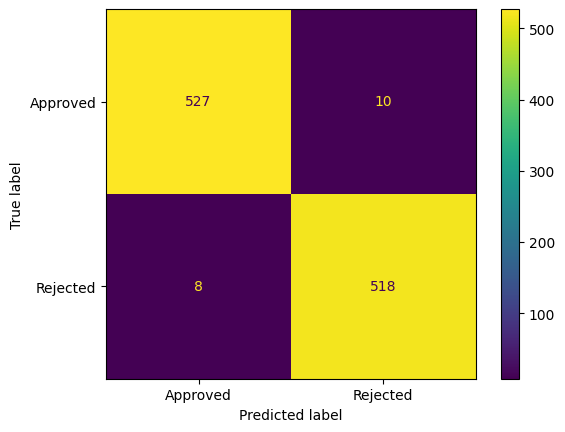

In [ ]:
labels = lab_enc.classes_
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_e), display_labels=labels)
disp.plot()
plt.show()

In [ ]:
print(f"""F1 Score: {f1_score(y_test, y_pred_e):.4f}
Precision Score: {precision_score(y_test, y_pred_e):.4f}
Accuracy Score: {accuracy_score(y_test, y_pred_e):.4f}
Recall Score Score: {recall_score(y_test, y_pred_e):.4f}""" )

F1 Score: 0.9829
Precision Score: 0.9811
Accuracy Score: 0.9831
Recall Score Score: 0.9848


With an accuracy of 0.98311, it correctly predicts the outcomes for almost all samples, indicating strong overall performance.
The precision of 0.9811 shows that when the model predicts a positive outcome, it is correct most of the time, meaning very few false positives occur. Similarly, the recall of 0.9848 indicates that the model successfully identifies nearly all actual positive cases, with very few false negatives.
The F1 score of 98.3% shows that the model balances both precision and recall effectively. Overall, the model is reliable and does a great job at correctly identifying both positive and negative cases.

However the model perform very well, it indicates potential overfitting since such high metrics are often suspicious. There could be many reasons such as small dataset, purely balance data et

## Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000


In [ ]:
scaler=StandardScaler()
X[["income_annum", "loan_amount", "cibil_score", "residential_assets_value", "commercial_assets_value", "luxury_assets_value", "bank_asset_value" ]]=scaler.fit_transform(X[["income_annum", "loan_amount", "cibil_score", "residential_assets_value", "commercial_assets_value", "luxury_assets_value", "bank_asset_value" ]])

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X_bal, y_bal, test_size=0.2, random_state=20)

In [ ]:
log_reg=LogisticRegression()
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred=log_reg.predict(X_test)
y_apred=lab_enc.inverse_transform(y_pred)

In [ ]:
print(f"""F1 Score: {f1_score(y_test, y_pred):.4f}
Precision Score: {precision_score(y_test, y_pred):.4f}
Accuracy Score: {accuracy_score(y_test, y_pred):.4f}
Recall Score Score: {recall_score(y_test, y_pred):.4f}""" )

F1 Score: 0.6036
Precision Score: 0.7403
Accuracy Score: 0.6689
Recall Score Score: 0.5095


Note that the metric values indicates that the logistic regression model does not perform very well. Particularly as compared to the decision tree model. However, we can tune the parameter such as regularization strength, penalty or solver to improve the performace of the model.